# Eigenfunctions of a 2-D exponential covariance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.insert(0, str(Path('..') / 'src'))
from kl_decomposition import fit_exp_sum, rectangle_rule, assemble_block
from kl_decomposition.galerkin import _legendre_phi

In [2]:
# Fit exp(-d) on [0, sqrt(2)] with 4 exponential terms
x, w = rectangle_rule(0.0, np.sqrt(2.0), 200)
a, b, _ = fit_exp_sum(4, x, w, lambda d: np.exp(-d), method='de_ls', max_gen=50, pop_size=30)
print('coeff a:', a)
print('coeff b:', b)

coeff a: [0.35017378 0.37461501 0.17723606 0.07938633]
coeff b: [  0.22517005   1.44815873  10.46156239 103.54558462]


In [3]:
# Assemble 2-D covariance matrix using 6 Legendre polynomials per dimension
n_leg = 6
blocks = [assemble_block((0.0, 1.0), coeff, n_leg) for coeff in b]
A2D = sum(ai * np.kron(B, B) for ai, B in zip(a, blocks))

In [4]:
# Compute the four largest eigenpairs
vals, vecs = np.linalg.eigh(A2D)
idx = np.argsort(vals)[::-1]
vals = vals[idx][:4]
vecs = vecs[:, idx][:, :4]
print('eigenvalues:', vals)

eigenvalues: [0.61555142 0.08801776 0.08801776 0.02800843]


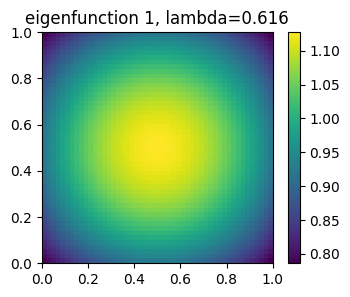

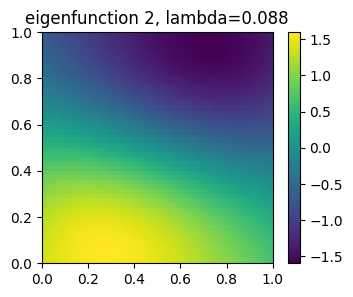

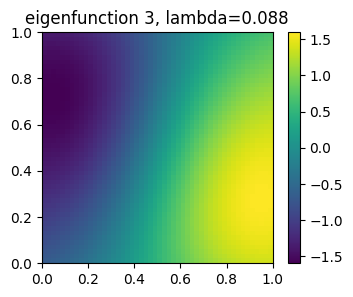

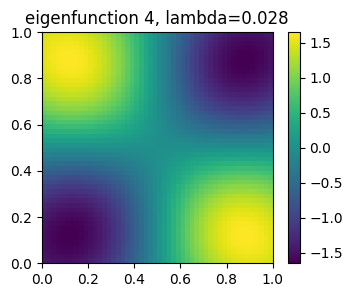

In [5]:
# Evaluate eigenfunctions on a grid and plot
xs = np.linspace(0.0, 1.0, 50)
phi = np.array([_legendre_phi(i, xs, 0.0, 1.0) for i in range(n_leg)])
for k in range(4):
    coeffs = vecs[:, k].reshape(n_leg, n_leg)
    vals_xy = np.zeros((len(xs), len(xs)))
    for i in range(n_leg):
        for j in range(n_leg):
            vals_xy += coeffs[i, j] * np.outer(phi[i], phi[j])
    plt.figure(figsize=(4, 3))
    plt.imshow(vals_xy, extent=[0,1,0,1], origin='lower')
    plt.title(f'eigenfunction {k+1}, lambda={vals[k]:.3f}')
    plt.colorbar()
    plt.show()